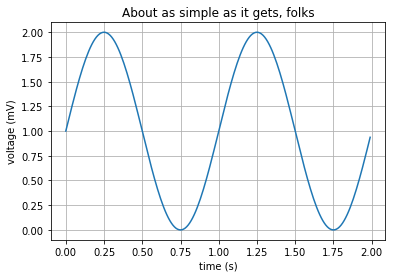

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2*np.pi*t)

# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots()
ax.plot(t,s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

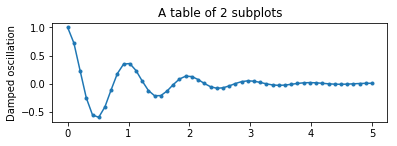

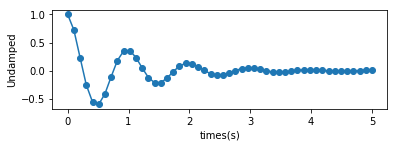

In [6]:
## Multiple subplots
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2*np.pi*x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2,1,1)
plt.plot(x1, y1, '.-')
plt.title('A table of 2 subplots')
plt.ylabel('Damped oscillation')
plt.show()

plt.subplot(2,1,2)
plt.plot(x1, y1, 'o-')
plt.xlabel('times(s)')
plt.ylabel('Undamped')

plt.show()

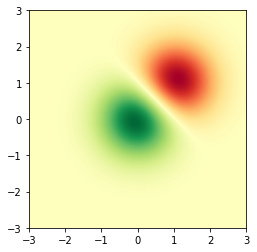

In [9]:
## Image Demo
from __future__ import print_function
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1 - Z2) * 2

im = plt.imshow(Z, interpolation='bilinear',cmap=cm.RdYlGn,
               origin='lower',extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin = -abs(Z).max())
plt.show()

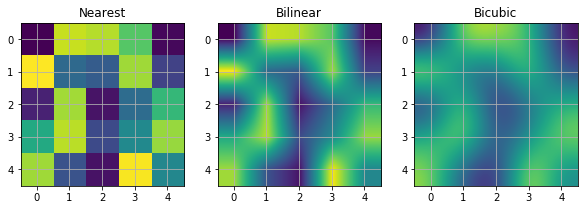

In [19]:
A = np.random.rand(5,5)

fig, axs = plt.subplots(1,3,figsize=(10,3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)
plt.show()

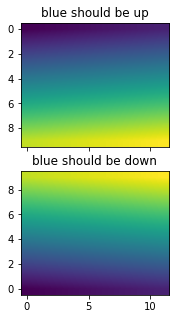

In [20]:
x = np.arange(120).reshape((10,12))
interp = 'bilinear'
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(3,5))
axs[0].set_title('blue should be up')
axs[0].imshow(x, origin='upper', interpolation=interp)

axs[1].set_title('blue should be down')
axs[1].imshow(x, origin='lower', interpolation=interp)
plt.show()

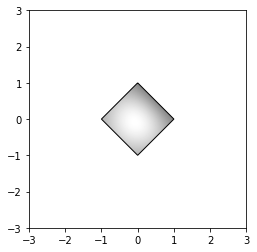

In [24]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2 - (Y-1)**2)
Z = (Z1 - Z2) * 2

path = Path([[0,1],[1,0],[0,-1],[-1,0],[0,1]])
patch = PathPatch(path, facecolor='none')

fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray,
               origin='lower', extent=[-3, 3, -3, 3],
               clip_path=patch, clip_on=True)
im.set_clip_path(patch)

plt.show()

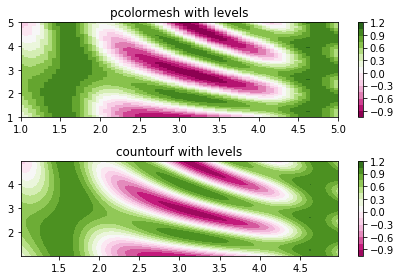

In [29]:
## pcolormesh
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

dx, dy = 0.05, 0.05

y,x = np.mgrid[slice(1, 5+dy, dy),
              slice(1, 5+dx, dx)]
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x,y,z,cmap=cmap,norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('countourf with levels')

fig.tight_layout()
plt.show()

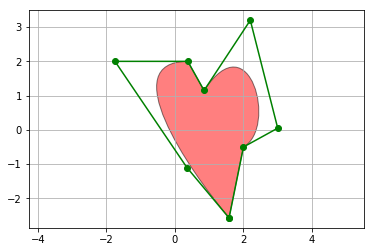

In [35]:
## PathPatch object
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.path as mpath


fig, ax = plt.subplots()
Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
     (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

#Plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')
ax.grid()
ax.axis('equal')
plt.show()